## Introduction
Rice, which is among the most widely produced grain products worldwide, has many genetic varieties. These varieties are separated from each other due to some of their features. These are usually features such as texture, shape, and color. With these features that distinguish rice varieties, it is possible to classify and evaluate the quality of seeds. In this study, Arborio, Basmati, Ipsala, Jasmine and Karacadag, which are five different varieties of rice often grown in Turkey, were used.

### Problem ###
+ Prediction of the variety of the rice


<h3> Data Source </h3>

 A total of 75,000 grain images, 15,000 from each of these varieties, are included in the dataset.
<br>
<a href=https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset>Original Data Source from Kaggle</a>

## Requirements

The following modules are required to run this program:

+ Numpy
+ Tensorflow
+ Keras API
+ Zipfile
+ OS 

In [1]:
import tensorflow as tf
from tensorflow import keras
import zipfile
import os
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt

In [3]:
zip_path='datasets/archive.zip'
zip1=zipfile.ZipFile(zip_path)
zip1.extractall('datasets/Rice_Image_Dataset')
zip1.close()

In [2]:
base_path='datasets/Rice_Image_Dataset/Rice_Image_Dataset'
arb_path=os.path.join(base_path,'Arborio')
bas_path=os.path.join(base_path,'Basmati')
ips_path=os.path.join(base_path,'Ipsala')
jas_path=os.path.join(base_path,'Jasmine')
kar_path=os.path.join(base_path,'Karacadag')
len(os.listdir(kar_path))

15000

In [3]:
xlist=os.listdir(kar_path)
xpath=os.path.join(kar_path,xlist[0])
timg=image.load_img(xpath)
img=image.img_to_array(timg)
img.shape

(250, 250, 3)

In [4]:
model=tf.keras.models.Sequential([ 
       tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(250,250,3)),
       tf.keras.layers.MaxPooling2D(2,2),
       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(512,activation='relu'),
       tf.keras.layers.Dense(5,activation='softmax')
    
])

In [5]:
# Image labeling using ImageDataGeneator
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255.,validation_split=0.2
                                  )
train_generator=train_datagen.flow_from_directory(
    base_path,
    subset='training',
    target_size=(250,250),
    class_mode='categorical'
)
val_generator=train_datagen.flow_from_directory(
    base_path,
    subset='validation' ,
    target_size=(250,250),
    class_mode='categorical'
)

Found 60000 images belonging to 5 classes.
Found 15000 images belonging to 5 classes.


In [6]:
# Callback function
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if logs.get('accuracy') is not None and logs.get('accuracy') > 0.99:
            print('Desired accuracy reached')
            self.model.stop_training=True

In [7]:
# Compile and fit the model
callback=myCallback()
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(train_generator,validation_data=val_generator,epochs=5,callbacks=[callback])

Epoch 1/5
1875/1875 [==============================] - 5157s 3s/step - loss: 0.1506 - accuracy: 0.9681 - val_loss: 0.0782 - val_accuracy: 0.9727
Epoch 2/5
1875/1875 [==============================] - 5100s 3s/step - loss: 0.0384 - accuracy: 0.9871 - val_loss: 0.0651 - val_accuracy: 0.9801
Epoch 3/5
1875/1875 [==============================] - 5104s 3s/step - loss: 0.0257 - accuracy: 0.9912 - val_loss: 0.0969 - val_accuracy: 0.9694
Desired accuracy reached


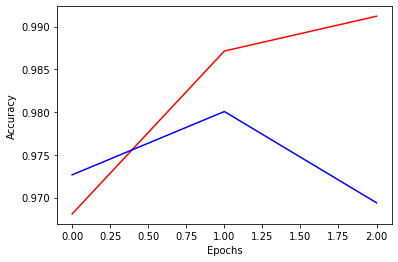

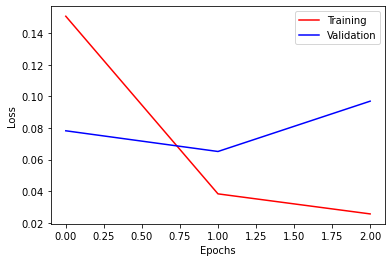

In [8]:
# Plot the accuracy and loss of the model
acc= history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(len(acc))
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs,acc,'r')
plt.plot(epochs,val_acc,'b')
label=['Training','Validation']
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(epochs,loss,'r')
plt.plot(epochs,val_loss,'b')
plt.legend(label)
plt.show()

In [9]:
# Print the indices assigned to Classes
label_map = train_generator.class_indices
label_map

{'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}

In [10]:
# Test with a out of set saved image
path='datasets/rice.jpg'
def test_model(path):
    img=image.load_img(path,target_size=(250,250))
    x=image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
#     images = np.vstack([x])
    ypred=model.predict(x)
    y_classes=list(np.argmax(ypred,axis=1))
    if y_classes[0]==0:
        print("This is Arborio ")
    elif y_classes[0]==1:
        print("This is Basmati")
    elif y_classes[0]==2:
         print("This is Ipsala ")
    elif y_classes[0]==3:
         print("This is Jasmine")
    elif y_classes[0]==4:
         print("This is Karacadag")
        
test_model(path)

This is Basmati


In [11]:
import pickle
with open('history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

## Conclusion

A accuracy of ~99% was achieved with CNN model